In [1]:
## For this multi class problem, I have used Naive Bayes, KNN, Decision Tree, logisitic regression and 
## SVM after tuning the optimal hyperparameters for every model. Their performance would be compared 
## based on the f1 score

import pandas as pd
from pandas import DataFrame
import numpy as np

path = 'C:/Users/Batool Fatima/Desktop/MSBA Fall 2019/MSBA 6420 - Predictive Analytics/'
data = pd.read_csv(path + 'car.data', header = None)


data.rename(columns = {0: 'buying', 1: 'maint', 2: 'doors', 3: 'persons',
4: 'lug_boot', 5:'safety', 6: 'class'}, inplace = True)

In [2]:
# In order to use NB, we need to convert features/categories into numerical data since onehotencoding
# will significantly break the independency rule

data_naivebayes = data.replace({'buying': {'low' : 1, 'med' : 2, 'high' : 3
, 'vhigh' : 4},
'maint' : {'low' : 1, 'med' : 2, 'high' : 3, 'vhigh' : 4},
'doors' : {'2': 2, '3' : 3, '5more' : 5},
'persons':{ '2':2,'4':4,'more':6},
'lug_boot' : {'small':1, 'med':2, 'big':3},
'safety' : {'low':1, 'med':2, 'high':3}})

In [3]:
# Split the data using stratified sampling
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

data_y = data_naivebayes.iloc[:,6].values
data_x = data_naivebayes.iloc[:,0:6].values

x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size
= 0.2, random_state = 1, stratify = data_y)

In [4]:
gnb = GaussianNB()

from sklearn.metrics import classification_report
y_pred_nb = gnb.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         acc       0.63      0.22      0.33        77
        good       0.67      0.14      0.24        14
       unacc       0.85      0.88      0.87       242
       vgood       0.19      1.00      0.32        13

    accuracy                           0.71       346
   macro avg       0.59      0.56      0.44       346
weighted avg       0.77      0.71      0.70       346



In [5]:
# using decision tree
# onehotencoding
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
data_y = data.iloc[:,6].values
data_x = data.iloc[:,0:6].values
data_x = onehotencoder.fit_transform(data_x).toarray()
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size
= 0.2, random_state = 1, stratify = data_y)

In [7]:
# Gridsearch to determine tune the hyperparameters: max_depth and min_samples_leaf
from sklearn.metrics import f1_score
#import warnings; warnings.simplefilter('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

depth={"max_depth":[1,5,10,15,20,25,30],
"min_samples_leaf" : [10,20,30]}
DTC=DecisionTreeClassifier()
grid_dt=GridSearchCV(DTC,param_grid=depth , cv=4, scoring= 'f1_weighted')
grid_dt.fit(x_train,y_train)
dt_result =pd.DataFrame(grid_dt.cv_results_)
grid_dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 10}

In [8]:
#Let's apply the model with the best hyperparameters
from sklearn.tree import DecisionTreeClassifier
final_dt = DecisionTreeClassifier(**grid_dt.best_params_)
y_pred_dt = final_dt.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         acc       0.90      0.94      0.92        77
        good       0.82      0.64      0.72        14
       unacc       1.00      0.98      0.99       242
       vgood       0.81      1.00      0.90        13

    accuracy                           0.96       346
   macro avg       0.88      0.89      0.88       346
weighted avg       0.96      0.96      0.96       346



In [9]:
## Using Logistic regression

onehotencoder = OneHotEncoder()
data_y = data.iloc[:,6].values
data_x = data.iloc[:,0:6].values
data_x = onehotencoder.fit_transform(data_x).toarray()
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size
= 0.2, random_state = 1, stratify = data_y)

In [10]:
# Given that the dependent variable is ordered data, it is most suited
# for ordered logit.

# using multiclass logit instead
from sklearn import linear_model
clf1 = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial')
y_pred_reg = clf1.fit(x_train, y_train).predict(x_test)

In [11]:
print(classification_report(y_test, y_pred_reg))

              precision    recall  f1-score   support

         acc       0.75      0.91      0.82        77
        good       1.00      0.29      0.44        14
       unacc       0.97      0.96      0.97       242
       vgood       0.82      0.69      0.75        13

    accuracy                           0.91       346
   macro avg       0.89      0.71      0.75       346
weighted avg       0.92      0.91      0.91       346



In [12]:
# using KNN

# Again let's use onehotencoding
onehotencoder = OneHotEncoder()
data_y = data.iloc[:,6].values
data_x = data.iloc[:,0:6].values
data_x = onehotencoder.fit_transform(data_x).toarray()
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size
= 0.2, random_state = 1, stratify = data_y)

In [13]:
# Using grid search to tune the two hyperparameters: 
# k and weight options using the weighted average scoring

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
#import warnings; warnings.simplefilter('ignore')

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv = 4, scoring = 'f1_weighted')

grid_knn.fit(x_train,y_train)
grid_knn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

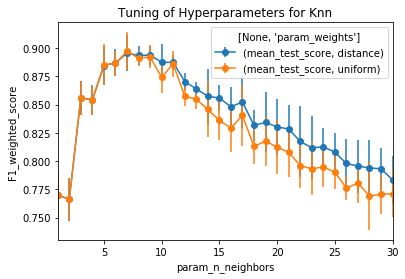

In [15]:
# visualizing the evolution of the weighted average for different combinations of the hyperparameters
import matplotlib.pyplot as plt
def plot_results( grid ,par_1,par_2, title, y_lab):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + par_1
    columns = 'param_' + par_2

# prepare the results into a pandas.DataFrame
    data = pd.DataFrame(grid.cv_results_)
# Remove the other by selecting their best values (from gscv.best_params_)

    other = [c for c in data.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
# Create pivot tables for easy plotting
    table_mean = data.pivot_table(index=index, columns=columns,
    values=['mean_test_score'])
    table_std = data.pivot_table(index=index, columns=columns,
    values=['std_test_score'])
    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',label=col_mean)

    plt.title(title)
    plt.ylabel(y_lab)
    plt.legend(title=table_mean.columns.names)
    plt.show()
plot_results(grid_knn ,par_1 = "n_neighbors",par_2 = "weights", title ="Tuning of Hyperparameters for Knn", y_lab= "F1_weighted_score")
plt.show()

In [16]:
# Let's apply the model with our tuned hyperparamters
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
y_pred_knn = neigh.fit(x_train, y_train).predict(x_test)

In [17]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         acc       0.88      0.88      0.88        77
        good       0.78      0.50      0.61        14
       unacc       0.96      0.98      0.97       242
       vgood       0.83      0.77      0.80        13

    accuracy                           0.93       346
   macro avg       0.86      0.78      0.82       346
weighted avg       0.93      0.93      0.93       346



In [18]:
# finally, moving onto SVM
# onehotencoding for the last time
onehotencoder = OneHotEncoder()
data_y = data.iloc[:,6].values
data_x = data.iloc[:,0:6].values
data_x = onehotencoder.fit_transform(data_x).toarray()
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size
= 0.2, random_state = 1, stratify = data_y)

In [19]:
# grid search to determine the best combination of hyperparameters: C and tol
# Use the linear kernel, since the data is linearly separable and logistic regression seems to be performing well

from sklearn import svm
#import warnings; warnings.simplefilter('ignore')

c_values = [0.01,0.1,1,10,100,1000]
tol_values = [0.0001,0.001,0.01,0.1]
param_grid = dict(C = c_values, tol = tol_values)
SVC_model = svm.SVC(kernel = 'linear')
grid_svc = GridSearchCV(SVC_model, param_grid, cv = 4, scoring = 'f1_weighted')

grid_svc.fit(x_train,y_train)
grid_svc.best_params_

{'C': 10, 'tol': 0.01}

In [20]:
# Finally, let's apply svm with these hyperparameters
#import warnings; warnings.simplefilter('ignore')

final_svc = svm.SVC(**grid_svc.best_params_)
y_pred_svc = final_svc.fit(x_train, y_train).predict(x_test)

In [21]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         acc       0.97      0.97      0.97        77
        good       1.00      0.93      0.96        14
       unacc       1.00      0.99      0.99       242
       vgood       0.87      1.00      0.93        13

    accuracy                           0.99       346
   macro avg       0.96      0.97      0.96       346
weighted avg       0.99      0.99      0.99       346



In [22]:
## Based on the weighted average f1 score, SVM is the best model. All models perform better for the class 'unacc',
## which was expected as 'unacc' represents about 70% of the dataset.

data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64